# Final Project
## ExGender Bias 
__Lucas Calero Forero, Rebecca McBrayer__

In [166]:
import os
import string
import re

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [24]:
english_corpus = []
spanish_corpus = []
french_corpus = []
german_corpus = []

for filename in os.listdir('dev'):
    if '.en.' in filename:
        with open(f'dev/{filename}') as f:
            english_corpus.extend(f.readlines())
    if '.es.' in filename:
        with open(f'dev/{filename}') as f:
            spanish_corpus.extend(f.readlines())
    if '.fr.' in filename:
        with open(f'dev/{filename}') as f:
            french_corpus.extend(f.readlines())
    if '.de.' in filename:
        with open(f'dev/{filename}') as f:
            german_corpus.extend(f.readlines())

In [68]:
def preprocess(corpus):
    useful = []
    for item in corpus:
        if len(item)> 4 and '<seg' in item:
            start = item.find('">')
            end = item.find('</')
            useful.append(item[start+3:end].lower())

    # Remove punctuation
    exclude = set(string.punctuation)
    nopun = []
    for st in useful:
        st = ''.join(ch for ch in st if ch not in exclude)
        nopun.append(st)

    # Add start and ending tokens, and make all words lowercase
    data = [sentence.split() for sentence in nopun]
    data = list(filter(lambda a: len(a)>2, data))  # Remove blank sentences
    return data

In [70]:
english_data = preprocess(english_corpus)
spanish_data = preprocess(spanish_corpus)
french_data = preprocess(french_corpus)
german_data = preprocess(german_corpus)

In [99]:
def remove_articles(data, articles):
    clean_data = []
    for st in data:
        st = [word for word in st if not word in articles]
        clean_data.append(st)
    return clean_data

english_articles = ['the', 'a']
spanish_articles = ['el', 'uno', 'la', 'un', 'una', 'los', 'las', 'unos', 'unas']
french_articles = ['le', 'la', 'les', 'une', 'un']
german_articles = ['der', 'die', 'das', 'dem', 'den', 'ein', 'eine', 'einer', 'einem', 'einen', 'des']

english_no = remove_articles(english_data, english_articles)
spanish_no = remove_articles(spanish_data, spanish_articles)
french_no = remove_articles(french_data, french_articles)
german_no = remove_articles(german_data, german_articles)

In [72]:
# Train embeddings on the full corpuses

english_model = Word2Vec(sentences=english_data, size=200, window=7, min_count=2, workers=4, sg=1)
spanish_model = Word2Vec(sentences=spanish_data, size=200, window=7, min_count=2, workers=4, sg=1)
french_model = Word2Vec(sentences=french_data, size=200, window=7, min_count=2, workers=4, sg=1)
german_model = Word2Vec(sentences=german_data, size=200, window=7, min_count=2, workers=4, sg=1)

print(f'English vocab size: {len(english_model.wv.vocab)}')
print(f'Spanish vocab size: {len(spanish_model.wv.vocab)}')
print(f'French vocab size: {len(french_model.wv.vocab)}')
print(f'German vocab size: {len(german_model.wv.vocab)}')

In [102]:
# Train embeddings on the corpuses without any articles

english_model_no = Word2Vec(sentences=english_no, size=200, window=7, min_count=2, workers=4, sg=1)
spanish_model_no = Word2Vec(sentences=spanish_no, size=200, window=7, min_count=2, workers=4, sg=1)
french_model_no = Word2Vec(sentences=french_no, size=200, window=7, min_count=2, workers=4, sg=1)
german_model_no = Word2Vec(sentences=german_no, size=200, window=7, min_count=2, workers=4, sg=1)

print(f'English no article vocab size: {len(english_model_no.wv.vocab)}')
print(f'Spanish no article vocab size: {len(spanish_model_no.wv.vocab)}')
print(f'French no article vocab size: {len(french_model_no.wv.vocab)}')
print(f'German no article vocab size: {len(german_model_no.wv.vocab)}')

In [158]:
english_words = ['President', 'Governor', 'Militant', 'Slow', 'Dress', 'Actress', 'Actor', 'Game', 'Player', 'Roses', 'women', 'men', 'Mother', 'Father', 'Voters', 'User', 'Ambition', 'Vulnerable', 'Boss', 'Busy', 'Cousin', 'Police', 'Model', 'Professor']
spanish_words = ['Presidenta', 'Presidente', 'Gobernador', 'Militante', 'Lenta', 'Lento', 'vestido', 'actriz', 'actor', 'Juego', 'Jugador', 'Rosas', 'señora', 'señor', 'Madre', 'Padre', 'votantes', 'Usuario', 'Ambición', 'vulnerable', 'Jefe', 'ocupada', 'ocupado', 'primo', 'prima', 'modelo', 'profesor', 'profesora']
french_words = ['Président', 'Présidente', 'Gouverneur', 'Militant', 'lente', 'robe', 'actrice', 'acteur', 'Jeu', 'Jouer', 'Roses', 'Femmes', 'Hommes', 'Mère', 'Père', 'électeurs', 'utilisateur', 'Ambition', 'vulnérable', 'patron', 'patronne', 'occupé', 'occupée', 'Cousine', 'police', 'modèle', 'professeur']
german_words = ['Präsident', 'Präsidentin', 'Gouverneur', 'Millitante', 'langsam', 'Kleid', 'Schauspielerin', 'Schauspieler', 'Spiel', 'Spieler', 'Frauen', 'Männer', 'Mutter', 'Vater', 'Wähler', 'Benutzer', 'Chef', 'Chefin',  'Polizei', 'Model', 'Professor', 'Professorin']

Removed words: Spanish - Gobernadora, jugadora, policia

               French - Gouverneure, lent, jouereuse, utilisatrice, cousin

               German - Gouverneurin, spielerin, Rosen, ehrgeiz, verletzlich, beschäftig, cousin, cousine, 

In [159]:
english_embeddings = [english_model.wv[word.lower()] for word in english_words]
spanish_embeddings = [spanish_model.wv[word.lower()] for word in spanish_words]
french_embeddings = [french_model.wv[word.lower()] for word in french_words]
german_embeddings = [german_model.wv[word.lower()] for word in german_words]

In [182]:
english_model.wv.vectors

array([[-1.8351480e-01, -8.8124275e-03, -1.9603644e-01, ...,
        -1.3350932e-01, -2.8938010e-01,  3.5647172e-02],
       [-2.1968852e-01, -9.1191726e-03, -1.5379448e-01, ...,
        -5.7910740e-02, -2.7341425e-01, -2.3293939e-01],
       [ 1.2772180e-01,  6.5964714e-02, -1.8611376e-03, ...,
         5.4212034e-02,  8.1969939e-02,  2.2275554e-01],
       ...,
       [ 1.6012872e-02,  1.1129532e-01, -2.7609371e-02, ...,
        -6.3324846e-02, -7.2078943e-02, -2.6214777e-02],
       [-8.1164613e-03,  7.9778261e-02, -3.3013806e-02, ...,
        -6.7444608e-02, -6.7230254e-02, -2.6370488e-02],
       [ 4.9883878e-05,  8.8775307e-02, -3.7944995e-02, ...,
        -5.4137923e-02, -7.6152042e-02, -2.6674777e-02]], dtype=float32)

In [199]:
def plot_pca(model, words, embeddings):
    pca = PCA(n_components=2)
    pca.fit(english_model.wv.vectors)
    transformed_embeddings = pca.transform(embeddings)
    
    plt.figure(figsize=(2.5*6.4, 2.5*4.8))
    for i in range(len(transformed_embeddings)):
        x = transformed_embeddings[i][0]
        y = transformed_embeddings[i][1]
        plt.plot(x, y, 'bo')
        plt.text(x * (1 + 0.01), y * (1 + 0.01) , words[i], fontsize=12)

    plt.show()

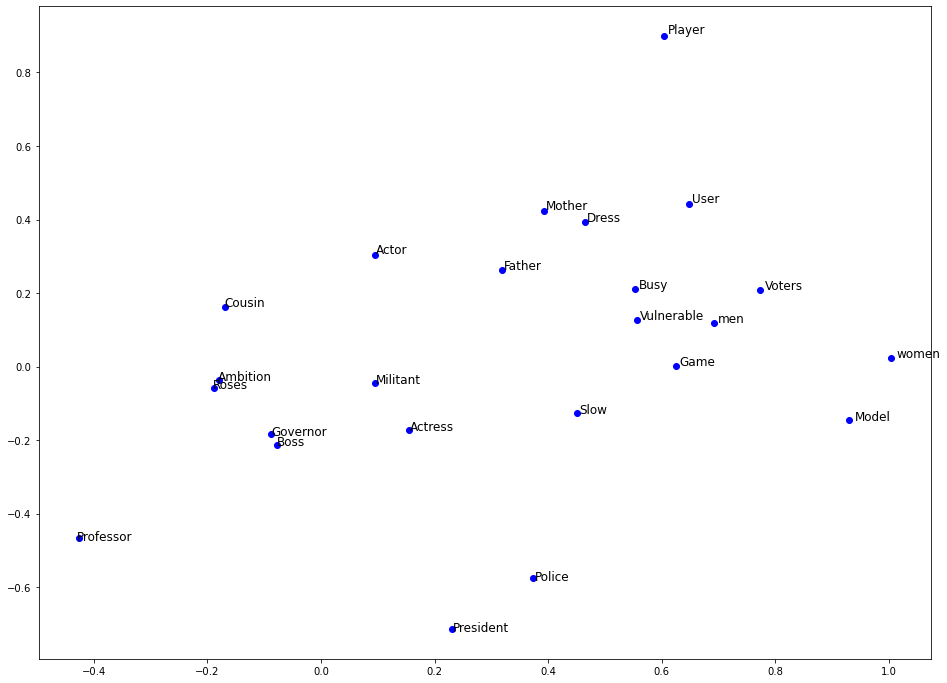

In [200]:
plot_pca(english_model, english_words, english_embeddings)

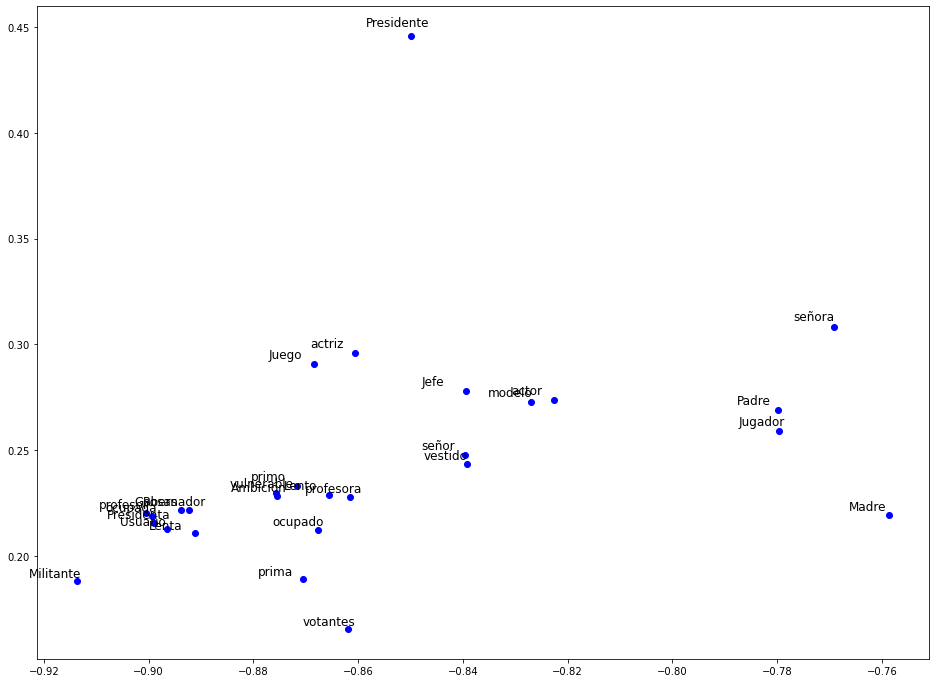

In [201]:
plot_pca(spanish_model, spanish_words, spanish_embeddings)

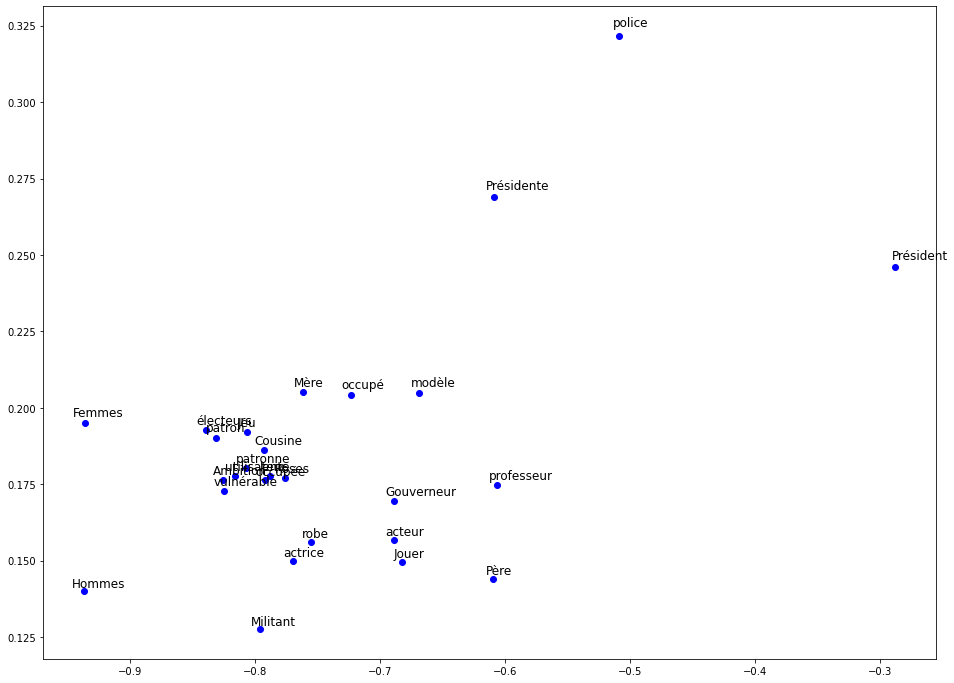

In [202]:
plot_pca(french_model, french_words, french_embeddings)

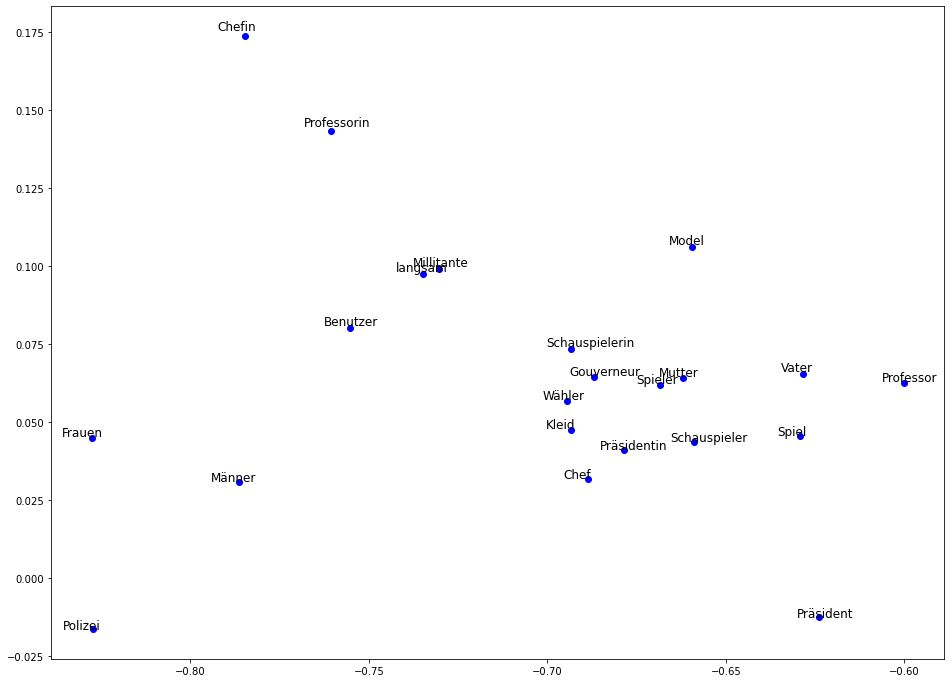

In [203]:
plot_pca(german_model, german_words, german_embeddings)